<h1 style="font-size:230%; font-family:Lora; color:#b60a1c">Data Mining Assignment (4th Milestone)</h1>
<h3 style="font-family:Lora; font-style:italic; color:#e39802">Ammar Alyousfi (WQD170064)</h3>

<br>

In this stage, we do the following:

- Interpretation of qualitative data (News and Twitter posts)
- Analysis of qualitative data (sentiment analysis)

# Importing libraries

In [1]:
import pandas as pd
import numpy as np
from IPython.display import HTML
from matplotlib import pyplot as plt
import re

pd.set_option('display.max_colwidth', 80)

<h1><span style="background:#272727; color:#d7ae04; font-size:1.1em">&nbsp;Twitter Data </span></h1>

# Reading the data

In [2]:
tweets = pd.read_csv('/Users/ammar/Documents/CS-and-work/UM MDatSc/3rd sem'
                     '/Data Mining/2nd Milestone/fullname_tweets.csv')

# Taking a look at the data

In [3]:
tweets.tail()

,company_fullname,tweet_text,favorite_count,created_at,hashtags,tweet_id,lang,urls,user_followers,user_screen_name,crawling_time
18411,ZELAN,Hirukia? Zelan gustatzen zaigun sexua!! https://t.co/CDhgNimKUQ,0.0,Wed Mar 27 07:26:02 +0000 2019,NaN,1.110805e+18,eu,https://www.instagram.com/p/BvgNkDpgtuA/?utm_source=ig_twitter_share&igshid=...,487.0,GaurDaBihar,2019-04-03|16:13
18412,ZELAN,@alif_aux Sedih gile doo...ni paling rendah selama aku kerja JUBM..\n\nTahun...,0.0,Wed Mar 27 07:09:17 +0000 2019,NaN,1.110801e+18,in,NaN,109.0,izzuddin_azman,2019-04-03|16:13
18413,ZELAN,RT @Zeukesan: Zelan heziko duzu ezagutzen ez dituzun gauzetan?\n\n¿Cómo vas ...,0.0,Wed Mar 27 06:36:44 +0000 2019,ParentalidadPositiva,1.110793e+18,eu,NaN,152.0,crisetxeandia,2019-04-03|16:13
18414,ZELAN,RT @Zeukesan: Zelan heziko duzu ezagutzen ez dituzun gauzetan?\n\n¿Cómo vas ...,0.0,Wed Mar 27 06:34:16 +0000 2019,ParentalidadPositiva,1.110792e+18,eu,NaN,41.0,PortuRupertoM,2019-04-03|16:13
18415,ZELAN,Nama : Zelan Algifari Denef\n\nTempat Lahir : Jakar...,0.0,Wed Mar 27 05:54:10 +0000 2019,NaN,1.110782e+18,in,NaN,189.0,JIMINgers,2019-04-03|16:13


# Interpreting the data

In [4]:
tweets_sample = tweets[tweets['lang'] == 'en'].sample(n=25, random_state=19)

In [5]:
for tweet_text, company_name in zip(
    tweets_sample['tweet_text'].values, 
    tweets_sample['company_fullname'].values):
    display(HTML("<strong>" + company_name + "</strong><p>" + tweet_text + "</p><hr>"))

<p style='font-size:20px; color:#981C2D; font-weight: bold'>&#10233; We will consider Twitter data irrelevant</p>

<hr>
<h1><span style="background:#272727; color:#d7ae04; font-size:1.1em">&nbsp;News Data </span></h1>

# Reading the data

In [6]:
news = pd.read_csv('theedgemarkets_news_corporate.csv')

# Taking a look at the data

In [7]:
news.shape

(338890, 8)

In [8]:
news.head()

,company_symbol,company_fullname,headline,url,datetime,text,in_headline,is_fullname
0,BURSA,BURSA MALAYSIA,Foreign funds turn net sellers as outflows exceed inflows,https://www.theedgemarkets.com/article/foreign-funds-turn-net-sellers-outflo...,"March 29, 2019 21:28 pm +08",KUALA LUMPUR (March 29): Foreign institutions turned net sellers in the FBM ...,No,Yes
1,BURSA-C18,BURSA MALAYSIA,Foreign funds turn net sellers as outflows exceed inflows,https://www.theedgemarkets.com/article/foreign-funds-turn-net-sellers-outflo...,"March 29, 2019 21:28 pm +08",KUALA LUMPUR (March 29): Foreign institutions turned net sellers in the FBM ...,No,Yes
2,BURSA-C20,BURSA MALAYSIA,Foreign funds turn net sellers as outflows exceed inflows,https://www.theedgemarkets.com/article/foreign-funds-turn-net-sellers-outflo...,"March 29, 2019 21:28 pm +08",KUALA LUMPUR (March 29): Foreign institutions turned net sellers in the FBM ...,No,Yes
3,BURSA-C21,BURSA MALAYSIA,Foreign funds turn net sellers as outflows exceed inflows,https://www.theedgemarkets.com/article/foreign-funds-turn-net-sellers-outflo...,"March 29, 2019 21:28 pm +08",KUALA LUMPUR (March 29): Foreign institutions turned net sellers in the FBM ...,No,Yes
4,BURSA-C22,BURSA MALAYSIA,Foreign funds turn net sellers as outflows exceed inflows,https://www.theedgemarkets.com/article/foreign-funds-turn-net-sellers-outflo...,"March 29, 2019 21:28 pm +08",KUALA LUMPUR (March 29): Foreign institutions turned net sellers in the FBM ...,No,Yes


# Interpreting the data

In [9]:
news_sample = news.sample(n=25, random_state=33)

In [10]:
for row in news_sample.itertuples():
    if row.is_fullname == 'Yes':
        display(HTML("<strong>" + row.company_fullname + "</strong>"))
    else:
        display(HTML("<strong>" + row.company_symbol + "</strong>"))
        
    if row.in_headline == 'Yes':
        display(HTML("<p><em>Headline:  </em> " + row.headline + "</p><hr>"))
    else:
        if row.is_fullname == 'Yes': 
            ind = row.text.lower().find(row.company_fullname.lower())
        else: 
            ind = row.text.lower().find(row.company_symbol.lower())
        excerpt = row.text[ind-200:ind+200]
        if (ind-200) < 0:
            excerpt = row.text[:ind+200]
        if (ind+200) > (len(row.text)-1):
            excerpt = row.text[ind-200:]
        display(HTML("<p><em>Body:  </em>" + excerpt + "</p><hr>"))

# Sentiment analysis of the news data

We will use a Python library, [TextBlob](https://github.com/sloria/textblob). <mark>TextBlob</mark> is a Python library for processing textual data; it stands on the giant shoulders of NLTK and pattern, and plays nicely with both.

The textblob.sentiments module contains two sentiment analysis implementations, **`PatternAnalyzer`**(based on the pattern library) and **`NaiveBayesAnalyzer`** (an NLTK classifier trained on a movie reviews corpus).

For `PatternAnalyzer`, the polarity score is a float within the range [-1.0, 1.0]. The subjectivity is a float within the range [0.0, 1.0] where 0.0 is very objective and 1.0 is very subjective.

In [11]:
from textblob import TextBlob
from textblob.sentiments import NaiveBayesAnalyzer
NBA = NaiveBayesAnalyzer()

In [12]:
display(HTML("<h3>The sentence: “The company is very good”</h3>"))
display(HTML("<h4>PatternAnalyzer</h4>"))
b = TextBlob("The company is very good")
display(HTML("<p style='font-family:\"Roboto Mono\"'>" + str(b.sentiment) + "</p>"))
display(HTML("<h4>NaiveBayesAnalyzer</h4>"))
b = TextBlob("The company is very good", analyzer=NBA)
display(HTML("<p style='font-family:\"Roboto Mono\"'>" + str(b.sentiment) + "</p>"))

In [13]:
def get_excerpt(row, limit=100):
    if row.in_headline == 'No':
        if row.is_fullname == 'Yes': 
            ind = row.text.lower().find(row.company_fullname.lower())
        elif row.is_fullname == 'No': 
            ind = row.text.lower().find(row.company_symbol.lower())
        excerpt = row.text[ind-limit:ind+limit]
        if (ind-limit) < 0:
            excerpt = row.text[:ind+limit]
        if (ind+limit) > (len(row.text)-1):
            excerpt = row.text[ind-limit:]
        return excerpt
    else:
        return ""

def get_sentiment_1(row):
    if row.in_headline == 'Yes':
        sentiment_text = row.headline
    else:
        sentiment_text = row.excerpt
    pattern_sentiment = TextBlob(sentiment_text).sentiment.polarity
    return pattern_sentiment
    
def get_sentiment_2(row):
    if row.in_headline == 'Yes':
        sentiment_text = row.headline
    else:
        sentiment_text = row.excerpt
    nltk_sentiment = TextBlob(sentiment_text, analyzer=NBA).sentiment
    nltk_sentiment = nltk_sentiment.p_pos - nltk_sentiment.p_neg
    return nltk_sentiment

In [14]:
news['excerpt'] = news.apply(func=get_excerpt, axis=1)
news['sentiment_1'] = news.apply(func=get_sentiment_1, axis=1)
news['sentiment_2'] = news.apply(func=get_sentiment_2, axis=1)

In [24]:
news.head()

,company_symbol,company_fullname,headline,url,datetime,text,in_headline,is_fullname,excerpt,sentiment_1,sentiment_2
0,BURSA,BURSA MALAYSIA,Foreign funds turn net sellers as outflows exceed inflows,https://www.theedgemarkets.com/article/foreign-funds-turn-net-sellers-outflo...,"March 29, 2019 21:28 pm +08",KUALA LUMPUR (March 29): Foreign institutions turned net sellers in the FBM ...,No,Yes,"ployment rate. So, we think the market will be very cautious next week,” he ...",0.115,0.995938
1,BURSA-C18,BURSA MALAYSIA,Foreign funds turn net sellers as outflows exceed inflows,https://www.theedgemarkets.com/article/foreign-funds-turn-net-sellers-outflo...,"March 29, 2019 21:28 pm +08",KUALA LUMPUR (March 29): Foreign institutions turned net sellers in the FBM ...,No,Yes,"ployment rate. So, we think the market will be very cautious next week,” he ...",0.115,0.995938
2,BURSA-C20,BURSA MALAYSIA,Foreign funds turn net sellers as outflows exceed inflows,https://www.theedgemarkets.com/article/foreign-funds-turn-net-sellers-outflo...,"March 29, 2019 21:28 pm +08",KUALA LUMPUR (March 29): Foreign institutions turned net sellers in the FBM ...,No,Yes,"ployment rate. So, we think the market will be very cautious next week,” he ...",0.115,0.995938
3,BURSA-C21,BURSA MALAYSIA,Foreign funds turn net sellers as outflows exceed inflows,https://www.theedgemarkets.com/article/foreign-funds-turn-net-sellers-outflo...,"March 29, 2019 21:28 pm +08",KUALA LUMPUR (March 29): Foreign institutions turned net sellers in the FBM ...,No,Yes,"ployment rate. So, we think the market will be very cautious next week,” he ...",0.115,0.995938
4,BURSA-C22,BURSA MALAYSIA,Foreign funds turn net sellers as outflows exceed inflows,https://www.theedgemarkets.com/article/foreign-funds-turn-net-sellers-outflo...,"March 29, 2019 21:28 pm +08",KUALA LUMPUR (March 29): Foreign institutions turned net sellers in the FBM ...,No,Yes,"ployment rate. So, we think the market will be very cautious next week,” he ...",0.115,0.995938


In [15]:
news_headlines = news[news.in_headline == 'Yes']

In [16]:
news_headlines.head()

,company_symbol,company_fullname,headline,url,datetime,text,in_headline,is_fullname,excerpt,sentiment_1,sentiment_2
10,VERTICE,VERTICE,Vertice and main sub-con mutually terminate RM218.5 mil contract,https://www.theedgemarkets.com/article/vertice-and-main-subcon-mutually-term...,"March 29, 2019 21:20 pm +08",KUALA LUMPUR (March 29): Vertice Bhd and Kumpulan Liziz Sdn Bhd have mutuall...,Yes,Yes,,0.166667,-0.252416
16,DBHD,DAMANSARA REALTY,Damansara Realty sells shop-office in JB to major shareholder,https://www.theedgemarkets.com/article/damansara-realty-sells-shopoffice-jb-...,"March 29, 2019 21:09 pm +08",KUALA LUMPUR (March 29): Damansara Realty Bhd is disposing of a shop-office ...,Yes,Yes,,0.062500,-0.022472
22,SUNWAY,SUNWAY,Sunway to buy quarry and premix plant operator to penetrate into new markets,https://www.theedgemarkets.com/article/sunway-buy-quarry-and-premix-plant-op...,"March 29, 2019 20:46 pm +08",KUALA LUMPUR (March 29): Sunway Bhd is acquiring Blacktop Industries Sdn Bhd...,Yes,Yes,,0.136364,-0.780629
23,SUNWAY-CQ,SUNWAY,Sunway to buy quarry and premix plant operator to penetrate into new markets,https://www.theedgemarkets.com/article/sunway-buy-quarry-and-premix-plant-op...,"March 29, 2019 20:46 pm +08",KUALA LUMPUR (March 29): Sunway Bhd is acquiring Blacktop Industries Sdn Bhd...,Yes,Yes,,0.136364,-0.780629
24,SUNWAY-CR,SUNWAY,Sunway to buy quarry and premix plant operator to penetrate into new markets,https://www.theedgemarkets.com/article/sunway-buy-quarry-and-premix-plant-op...,"March 29, 2019 20:46 pm +08",KUALA LUMPUR (March 29): Sunway Bhd is acquiring Blacktop Industries Sdn Bhd...,Yes,Yes,,0.136364,-0.780629


In [17]:
news_headlines = news_headlines.drop_duplicates(subset=['company_fullname', 'url'])
grouped = news_headlines.groupby('company_symbol')

# The number of news articles about companies

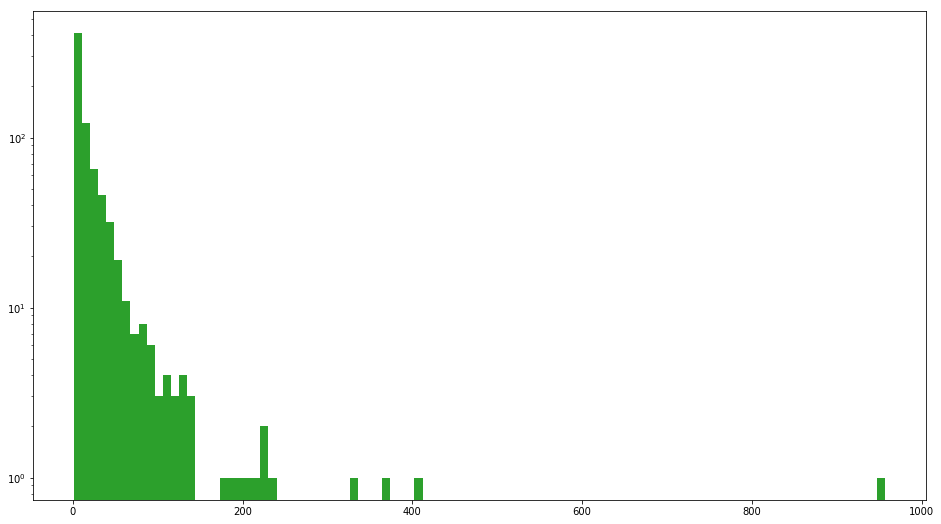

In [18]:
sizes = []
for name, group in grouped:
    sizes.append(group.shape[0])
plt.figure(figsize=(16, 9))
plt.hist(sizes, bins=100, color='tab:green', log=True);

In [19]:
def plot_sentiment(group, which='1', figsize=(16,10), color='tab:green'):
    group = group.copy()
    group['datetime'] = group.datetime.str.replace(r'am', r'AM')
    group['datetime'] = group.datetime.str.replace(r'pm', r'PM')
    group['datetime'] = group.datetime.str.replace(r' (AM|PM) \+\d\d$', '')
    group['datetime'] = pd.to_datetime(group.datetime, format='%B %d, %Y %H:%M')
    group.index = group.datetime
    group.drop('datetime', axis=1, inplace=True)
    group.sort_index(inplace=True)
    fig, ax = plt.subplots(figsize=figsize)
    if which == '1':
        ax.plot(group.sentiment_1, color=color, linewidth=2)
    elif which == '2':
        ax.plot(group.sentiment_2, color='tab:orange', linewidth=2)
    elif which == 'both':
        ax.plot(group.sentiment_1, color=color, linewidth=2, alpha=0.7)
        ax.plot(group.sentiment_2, color='tab:orange', linewidth=2, alpha=0.7)
    return group

# Selecting companies with more than 200 news articles

In [20]:
selected_companies = {}
for name, group in grouped:
    if group.shape[0] > 200:
        selected_companies[name] = group

In [21]:
sel_df = pd.DataFrame(columns=['Company', 'Number of News'])
for k, v in selected_companies.items():
    sel_df.loc[sel_df.shape[0], :] = (k, v.shape[0])
sel_df.sort_values(by='Number of News', ascending=False, inplace=True)
sel_df.reset_index(drop=True, inplace=True)
sel_df

,Company,Number of News
0,CIMB,957
1,GENTING,409
2,FGV,365
3,SIME,330
4,UMW,232
5,GAMUDA,226
6,SAPNRG,224
7,SUNWAY,213
8,MRCB,203
9,TM,201


# Plotting how sentiment changes over time

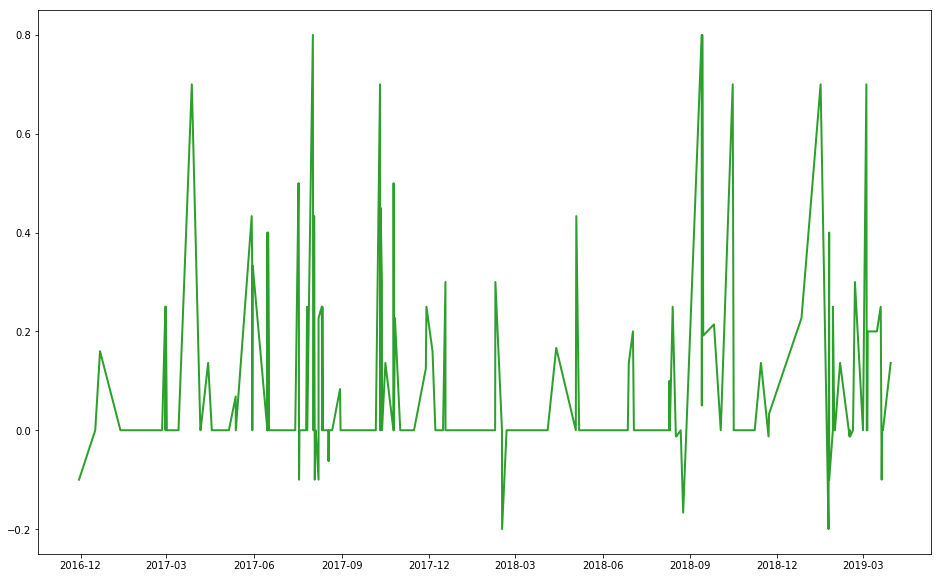

In [22]:
grp = plot_sentiment(selected_companies['SUNWAY'])

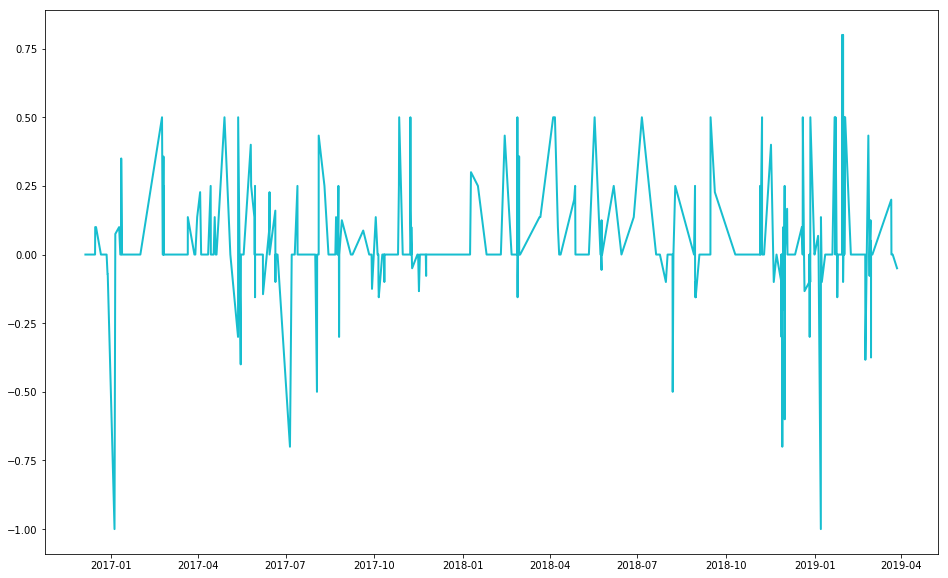

In [23]:
grp = plot_sentiment(selected_companies['GENTING'], color='#17becf')

### The end